In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import recall_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG, display
import shap

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml1_final_project/data_cardiovascular_risk.csv')

In [ ]:
# df.head().to_csv('cardio_head.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.isnull().sum()
# df.isnull().sum().to_csv('cardio_nulls.csv')

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Checking for duplicated values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

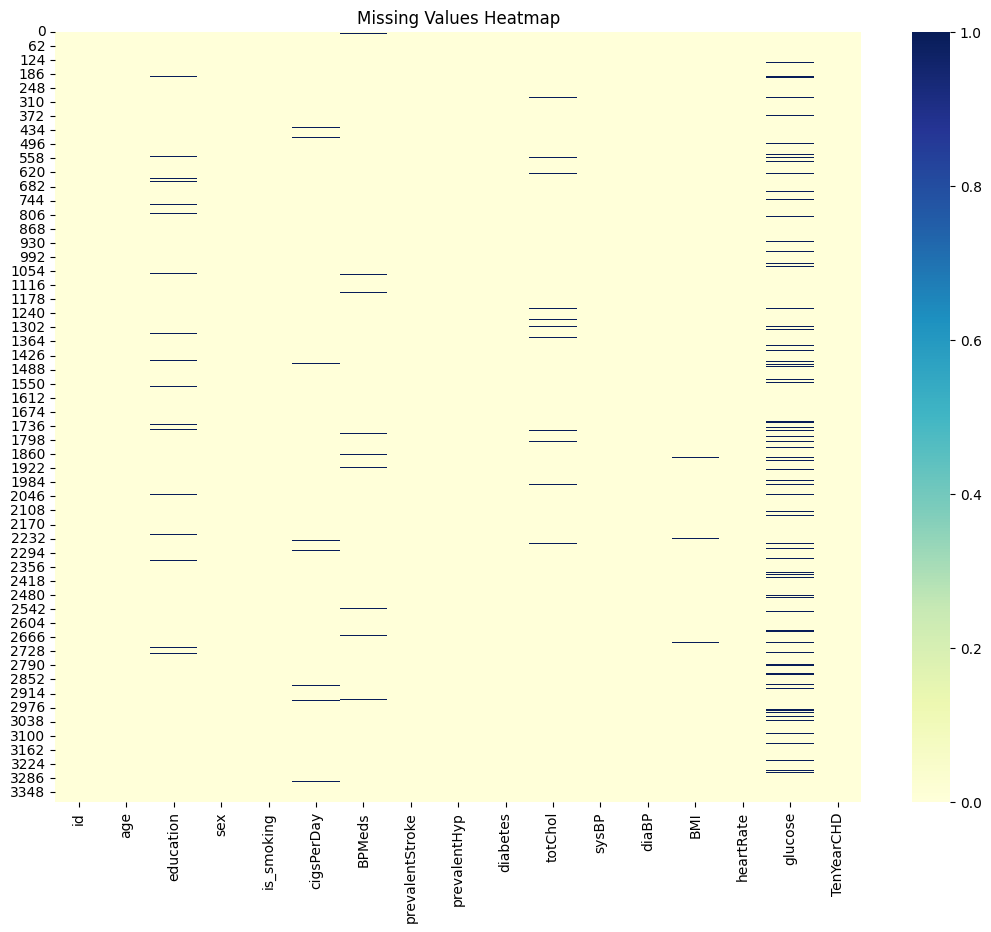

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.isna(), cmap="YlGnBu")
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

In [ ]:
categorical_columns

Index(['sex', 'is_smoking'], dtype='object')

In [ ]:
numerical_columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
columns_to_convert = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
df[columns_to_convert] = df[columns_to_convert].astype('object')

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

In [ ]:
categorical_columns

Index(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD'],
      dtype='object')

In [ ]:
numerical_columns

Index(['id', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [ ]:
for col in categorical_columns:
  print(f'{col} {df[col].dropna().unique()})')

education [2.0 4.0 1.0 3.0])
sex ['F' 'M'])
is_smoking ['YES' 'NO'])
BPMeds [0.0 1.0])
prevalentStroke [0 1])
prevalentHyp [0 1])
diabetes [0 1])
TenYearCHD [1 0])


In [ ]:
df['id'].duplicated().sum()

0

In [ ]:
df['id'].nunique()

3390

In [ ]:
df.shape

(3390, 17)

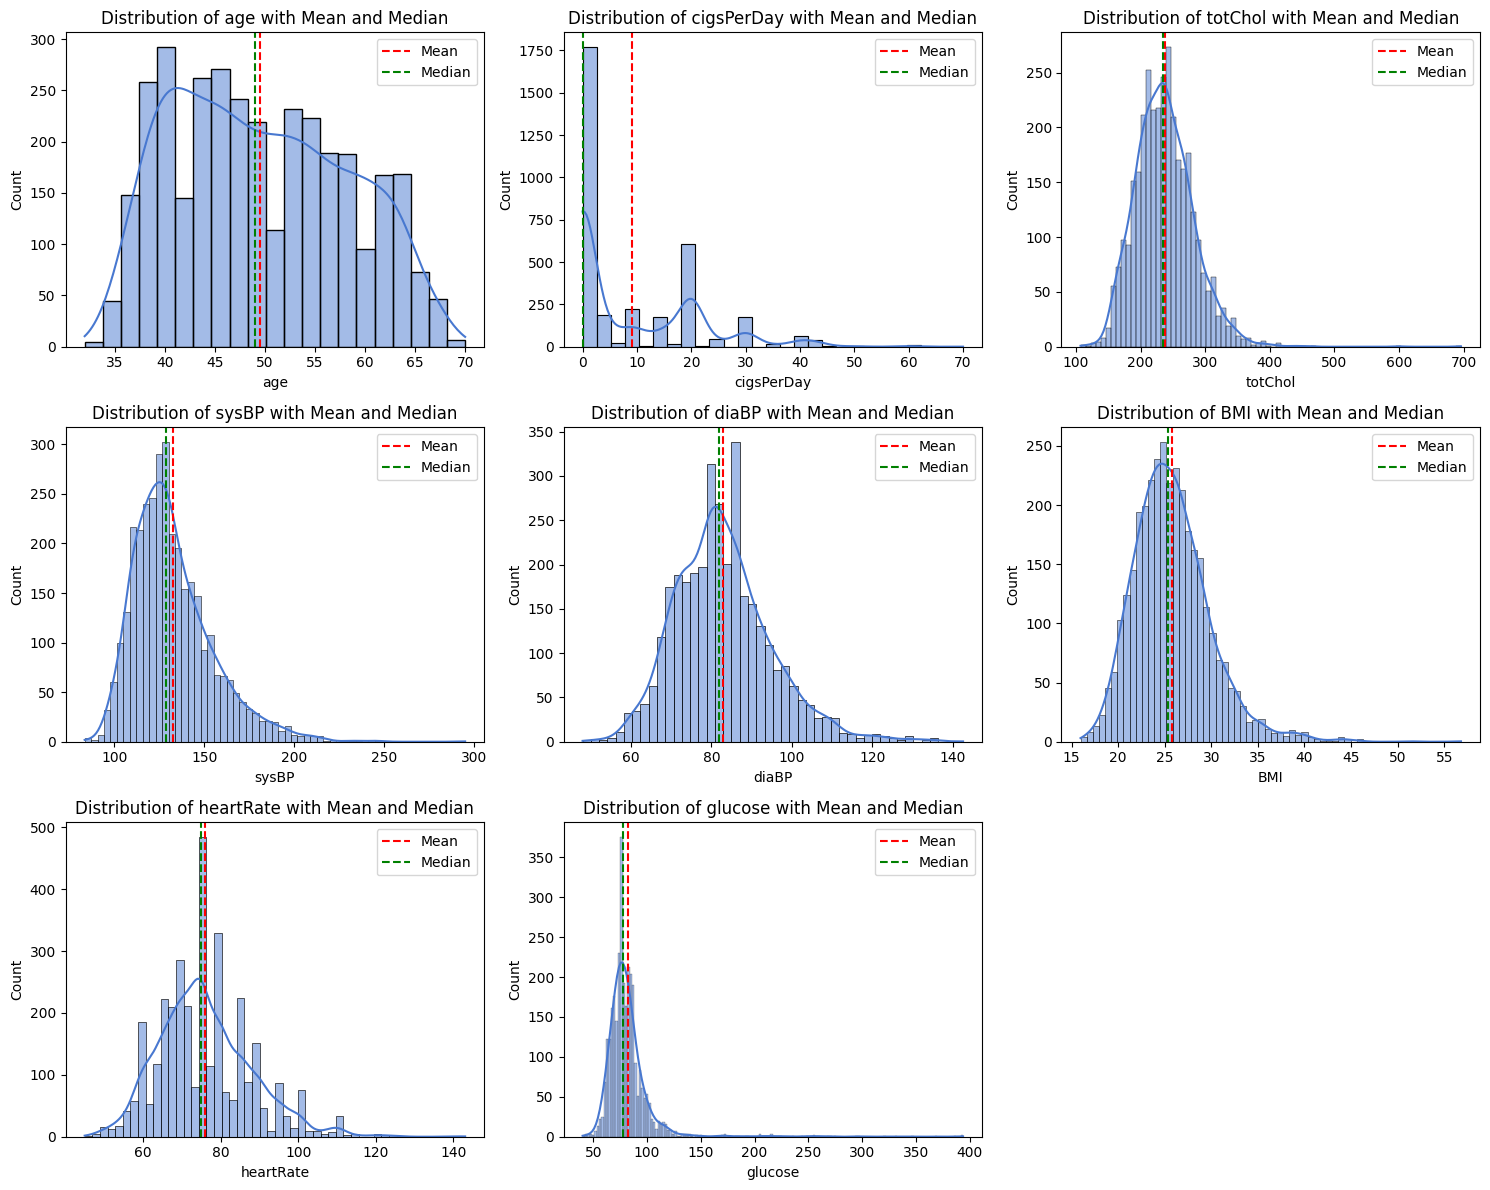

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("muted")
# Get the numerical columns
numerical_columns = df.select_dtypes(include='number').columns.drop('id')

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_rows = int(num_plots / 3) + 1
num_cols = 3

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.axvline(df[column].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[column].median(), color='green', linestyle='--', label='Median')
    ax.set_title(f'Distribution of {column} with Mean and Median')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend()

# Remove any extra subplots
if num_plots < len(axes):
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


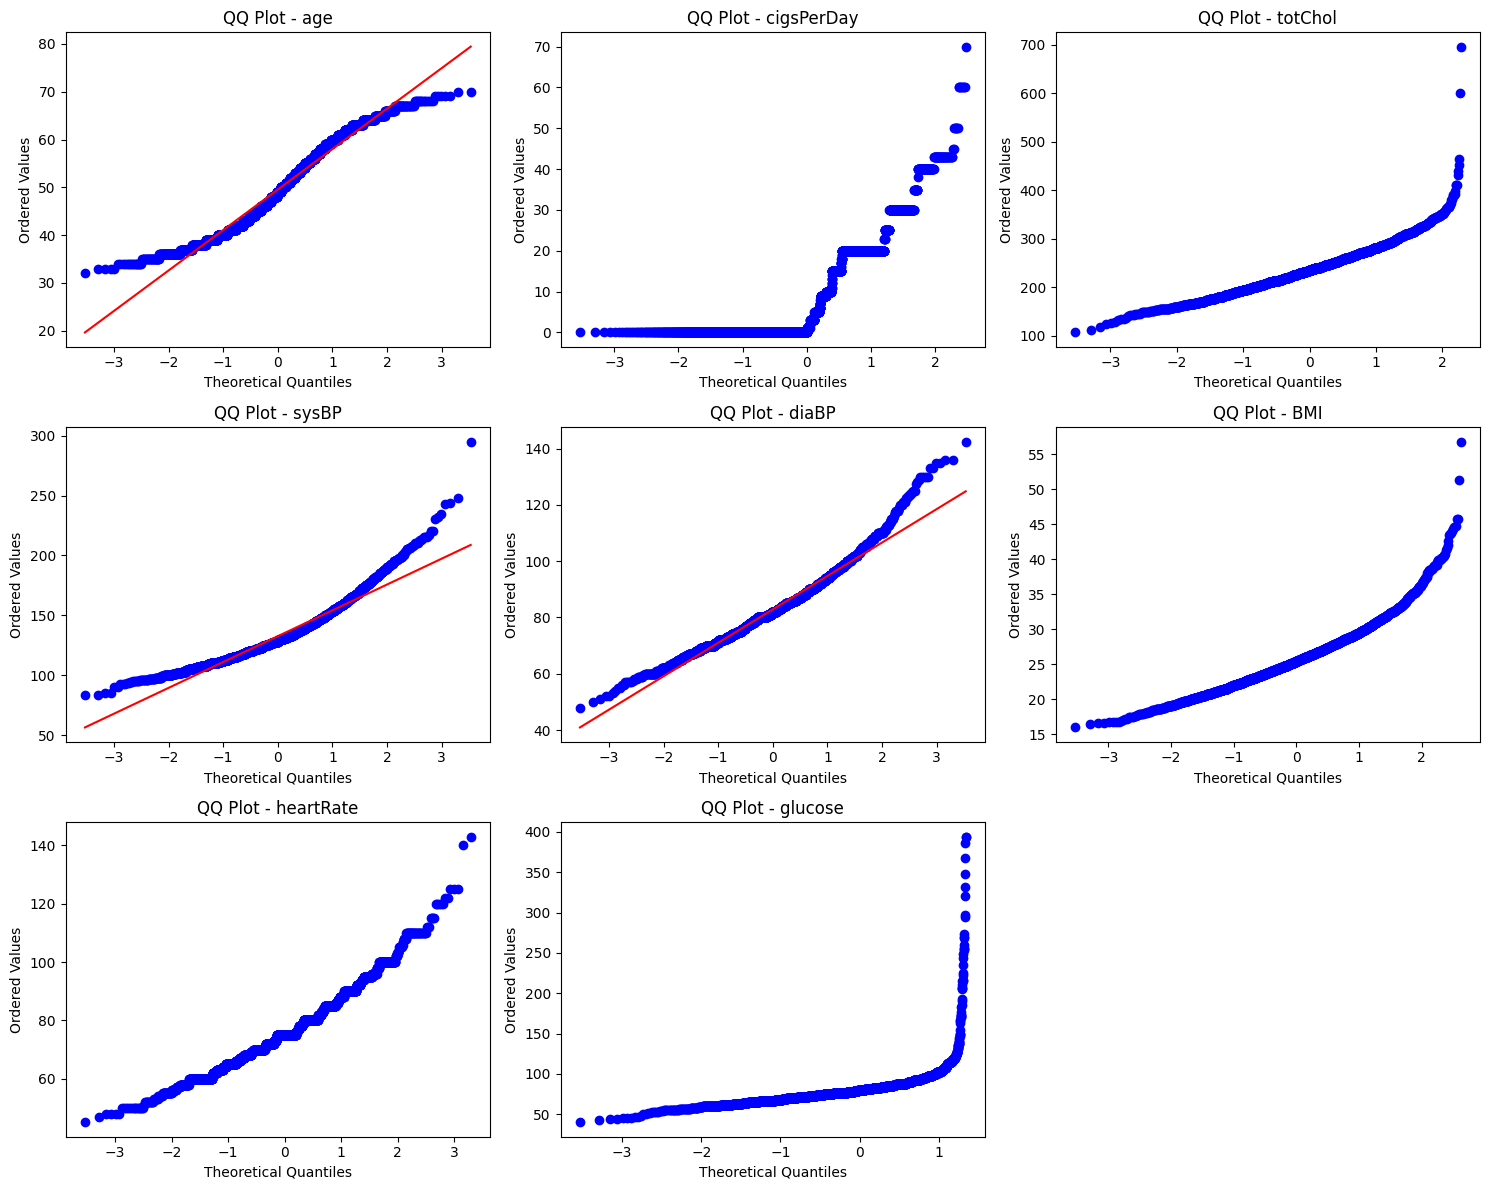

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numerical columns
numerical_columns = df.select_dtypes(include='number').columns.drop('id')

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_rows = int(num_plots / 3) + 1
num_cols = 3

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the numerical columns and plot the QQ plots
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    stats.probplot(df[column], plot=ax)
    ax.set_title(f'QQ Plot - {column}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Ordered Values')

# Remove any extra subplots
if num_plots < len(axes):
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


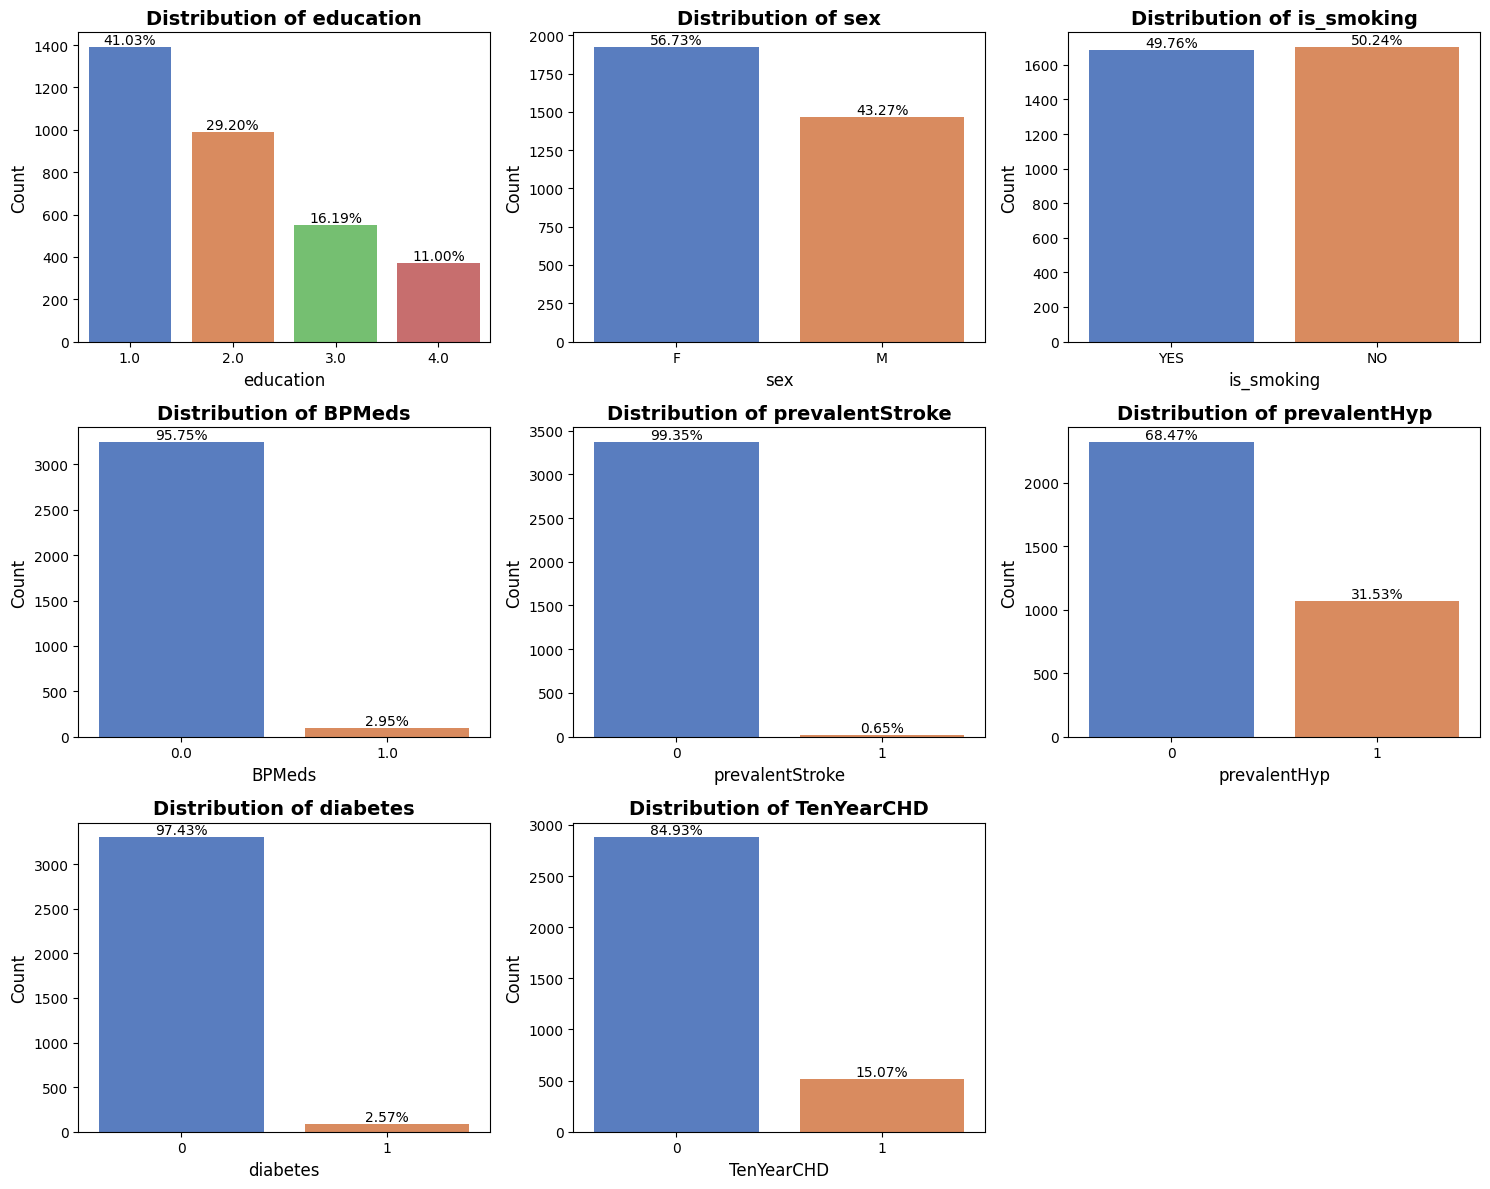

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the number of rows and columns for subplots
num_plots = len(categorical_columns)
num_rows = int(num_plots / 3) + 1
num_cols = 3

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the categorical columns and plot the distributions
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=column, ax=ax, palette='muted')
    ax.set_title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    # Add percentage labels
    total = len(df[column])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Remove any extra subplots
if num_plots < len(axes):
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
# sns.pairplot(df, hue ='age')

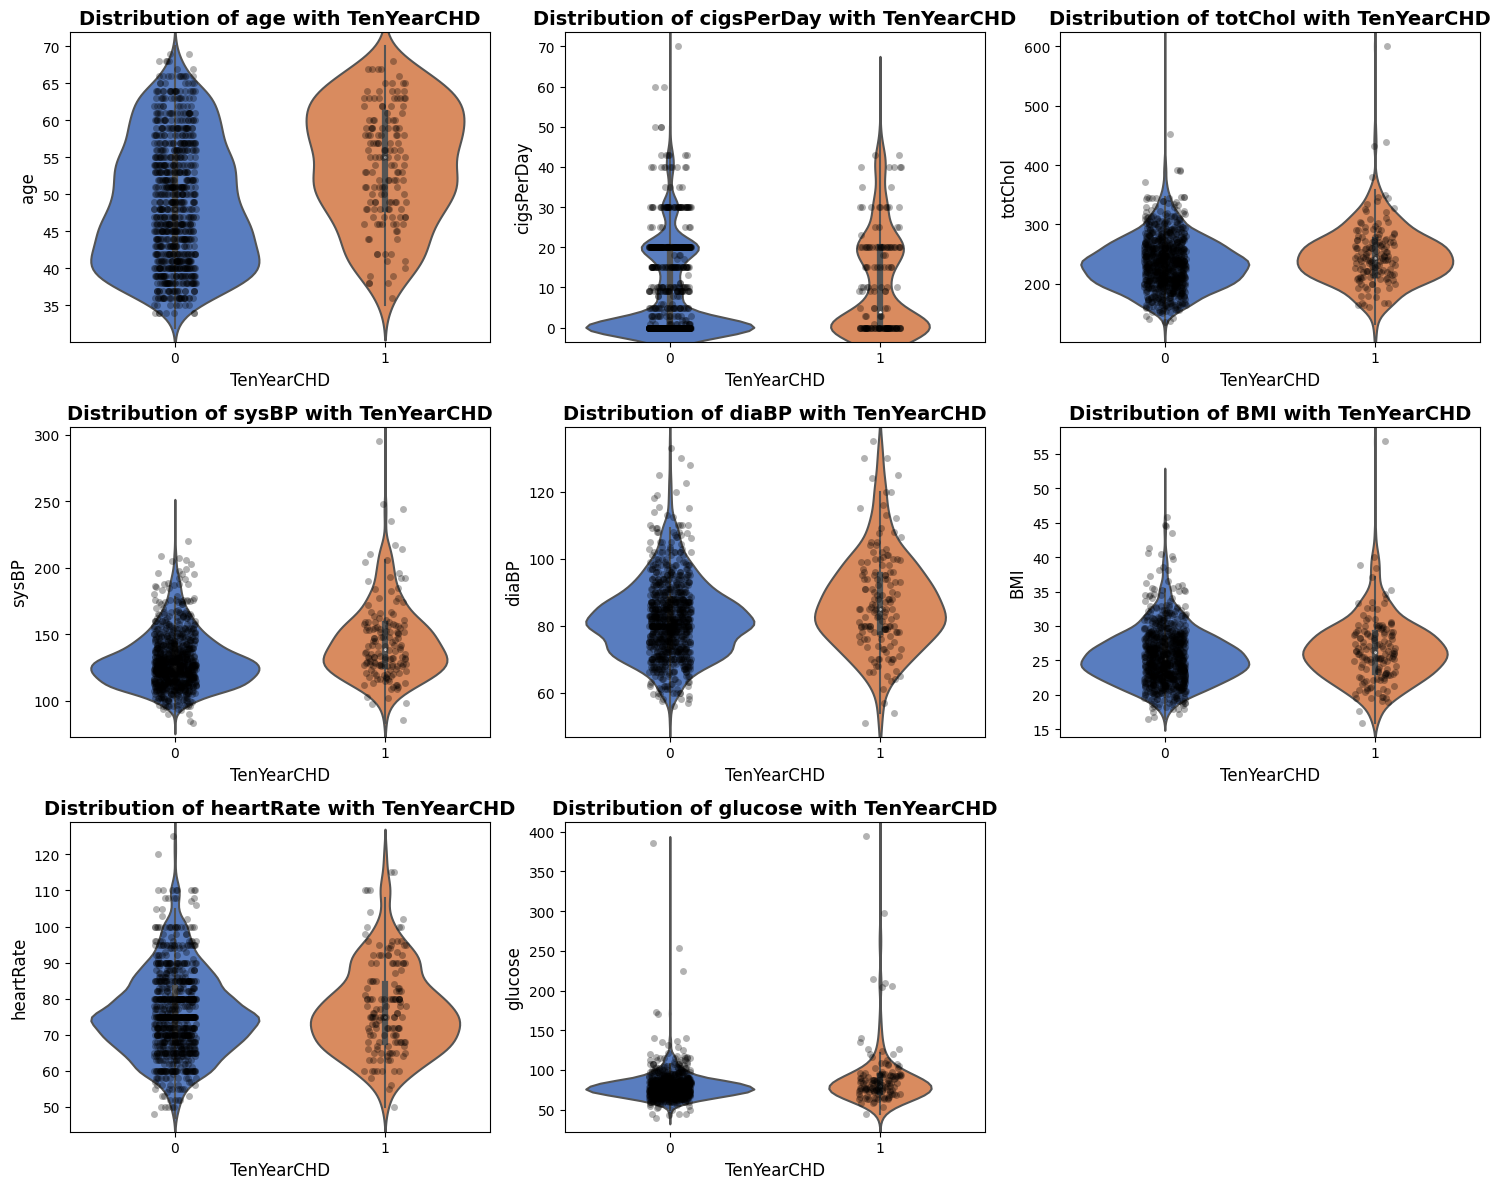

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_rows = int(num_plots / 3) + 1
num_cols = 3

num_points = 1000

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the numerical columns and plot the violin plots with scatterplot overlay
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.violinplot(data=df, x="TenYearCHD", y=column, ax=ax, palette='muted')
    subset_df = df.sample(n=num_points, random_state=42)
    sns.stripplot(data=subset_df, x="TenYearCHD", y=column, ax=ax, color="black", alpha=0.3)
    ax.set_title(f'Distribution of {column} with TenYearCHD', fontsize=14, fontweight='bold')
    ax.set_xlabel('TenYearCHD', fontsize=12)
    ax.set_ylabel(column, fontsize=12)

# Remove any extra subplots
if num_plots < len(axes):
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
categorical_columns

Index(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD'],
      dtype='object')

In [ ]:
cat_cols_without_target = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

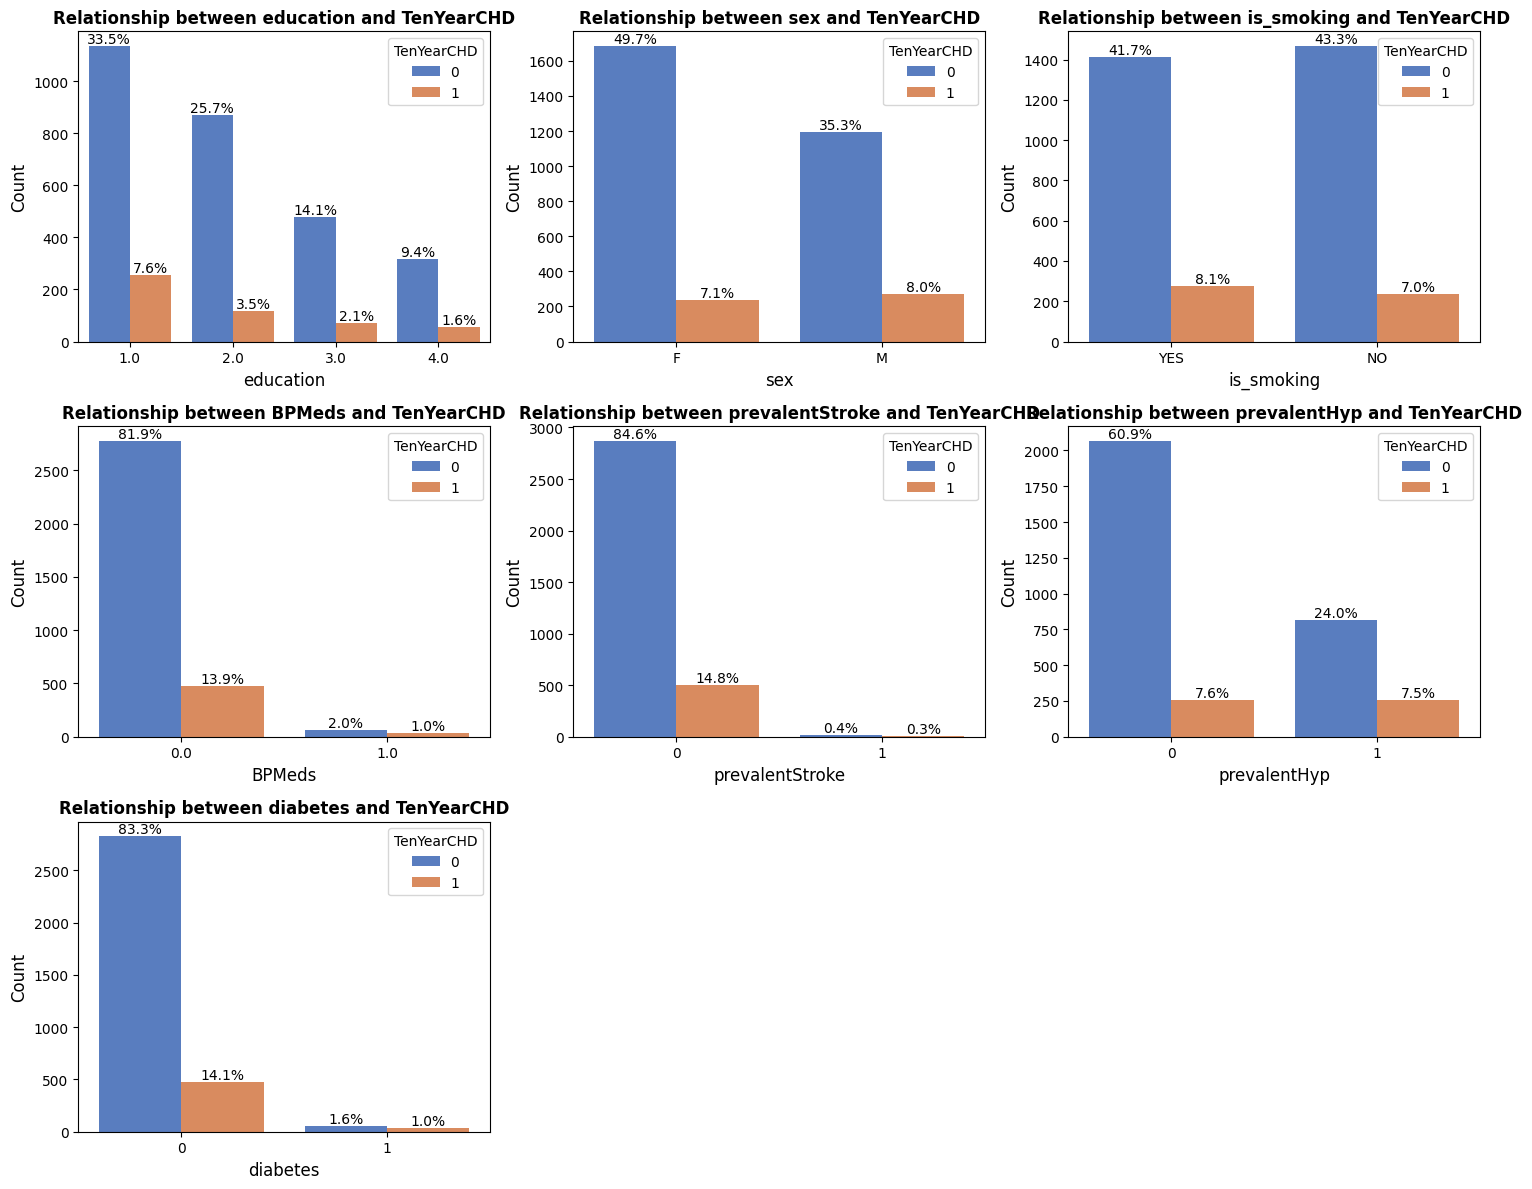

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of rows and columns for subplots
num_plots = len(cat_cols_without_target)
num_rows = int(num_plots / 3) + 1
num_cols = 3

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the categorical columns and plot the bivariate bar plots
for i, column in enumerate(cat_cols_without_target):
    ax = axes[i]
    sns.countplot(data=df, x=column, hue='TenYearCHD', ax=ax, palette="muted")
    ax.set_title(f'Relationship between {column} and TenYearCHD', fontsize=12, fontweight='bold')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='TenYearCHD', loc='upper right')

    # Add labels with percentages
    total_height = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total_height * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Remove any extra subplots
if num_plots < len(axes):
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
def colorise(val, threshold, equality = 'greater', font = None, absolute = False):
  '''Function to conditionally format the fonts:
  Inputs - value to compare, threshold value, equality (greater or lesser), font color and absolute (Boolean)'''
  
  if absolute == True:
    val = abs(val)
  if equality == 'lesser':
    threshold*= -1
    val*= -1
  if val > threshold and val != 1:
    return f'color : {font}; font-weight : bold'

df.corr().style.applymap(colorise, threshold = 0.6, equality = 'greater', absolute = True, font = 'red')


,id,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
id,1.000000,0.016759,-0.017249,-0.019889,0.019676,0.000832,0.039849,0.024684,0.015517
age,0.016759,1.000000,-0.192335,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135
cigsPerDay,-0.017249,-0.192335,1.000000,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797
totChol,-0.019889,0.274028,-0.024703,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723
sysBP,0.019676,0.404845,-0.100834,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090
diaBP,0.000832,0.221896,-0.068785,0.154974,0.781908,1.000000,0.380498,0.174904,0.071499
BMI,0.039849,0.138176,-0.100996,0.114305,0.333864,0.380498,1.000000,0.069655,0.093454
heartRate,0.024684,-0.002596,0.066759,0.087458,0.178262,0.174904,0.069655,1.000000,0.088334
glucose,0.015517,0.116135,-0.068797,0.062723,0.143090,0.071499,0.093454,0.088334,1.000000


In [ ]:
correlations = df.corr().style.applymap(colorise, threshold = 0.6, equality = 'greater', absolute = True, font = 'red')

# Convert the styled DataFrame to a regular DataFrame
correlations_df = pd.DataFrame(correlations.data)

# Save the DataFrame as a CSV file
correlations_df.to_csv('correlations.csv', index=False)

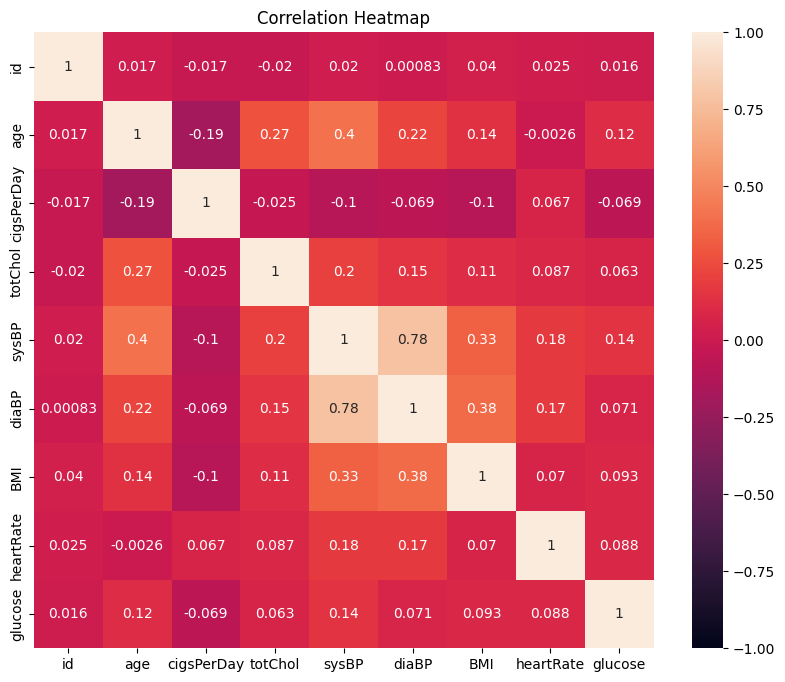

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn palette to "muted"
sns.set_palette("muted")

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


### Removing Nulls

In [ ]:
categorical_columns

Index(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD'],
      dtype='object')

In [ ]:
df[categorical_columns].isnull().sum().sort_values(ascending=False)

education          87
BPMeds             44
sex                 0
is_smoking          0
prevalentStroke     0
prevalentHyp        0
diabetes            0
TenYearCHD          0
dtype: int64

In [ ]:
null_counts = df.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of null values in each numerical column
null_percentages = (null_counts / len(df)) * 100

# Create a DataFrame with null counts and percentages
null_table = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

# Display the null table
print(null_table)

                 Null Count  Null Percentage
glucose                 304         8.967552
education                87         2.566372
BPMeds                   44         1.297935
totChol                  38         1.120944
cigsPerDay               22         0.648968
BMI                      14         0.412979
heartRate                 1         0.029499
id                        0         0.000000
diaBP                     0         0.000000
sysBP                     0         0.000000
prevalentHyp              0         0.000000
diabetes                  0         0.000000
age                       0         0.000000
prevalentStroke           0         0.000000
is_smoking                0         0.000000
sex                       0         0.000000
TenYearCHD                0         0.000000


In [ ]:
null_table.to_csv('numerical_nulls_table1.csv')

In [ ]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
# Remove rows where 'bpmeds' column is null
df = df.dropna(subset=['BPMeds'])


In [ ]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

glucose            302
education           87
totChol             37
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
BPMeds               0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

In [ ]:
df.shape

(3346, 17)

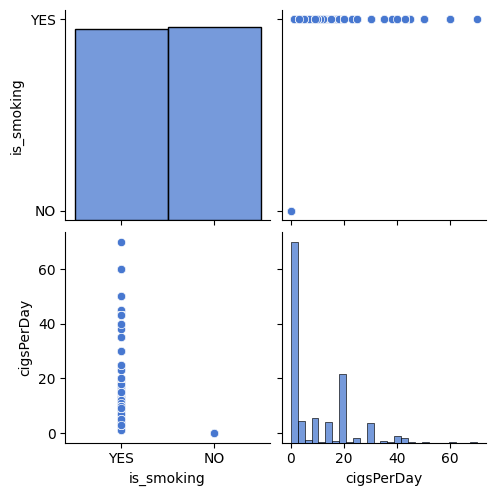

In [ ]:
sns.pairplot(df, vars = ['is_smoking', 'cigsPerDay'])

In [ ]:
df[df['is_smoking'] == 'NO']['cigsPerDay'].value_counts()

0.0    1679
Name: cigsPerDay, dtype: int64

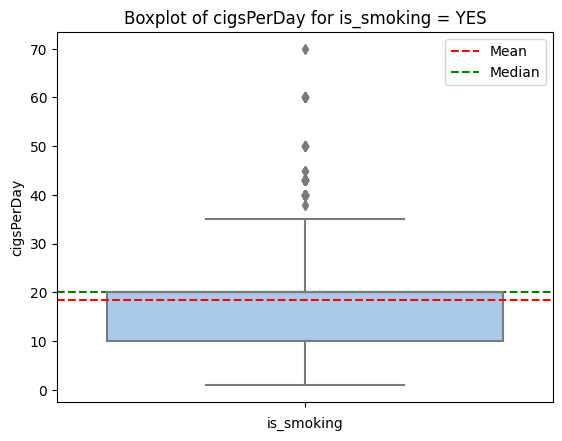

In [ ]:

# Subset the data for 'is_smoking' == 'YES'
subset_data = df[df['is_smoking'] == 'YES']

# Create the boxplot
sns.boxplot(data=subset_data, y='cigsPerDay', palette='pastel')

# Calculate and display the mean and median
mean_val = subset_data['cigsPerDay'].mean()
median_val = subset_data['cigsPerDay'].median()

plt.axhline(mean_val, color='red', linestyle='--', label='Mean')
plt.axhline(median_val, color='green', linestyle='--', label='Median')

# Set the labels and title
plt.xlabel('is_smoking')
plt.ylabel('cigsPerDay')
plt.title('Boxplot of cigsPerDay for is_smoking = YES')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
imputing_median1 = df[df['is_smoking'] == 'YES']['cigsPerDay'].median()
df['cigsPerDay'] = df['cigsPerDay'].fillna(imputing_median1)

In [ ]:
df['cigsPerDay'].isna().sum()

0

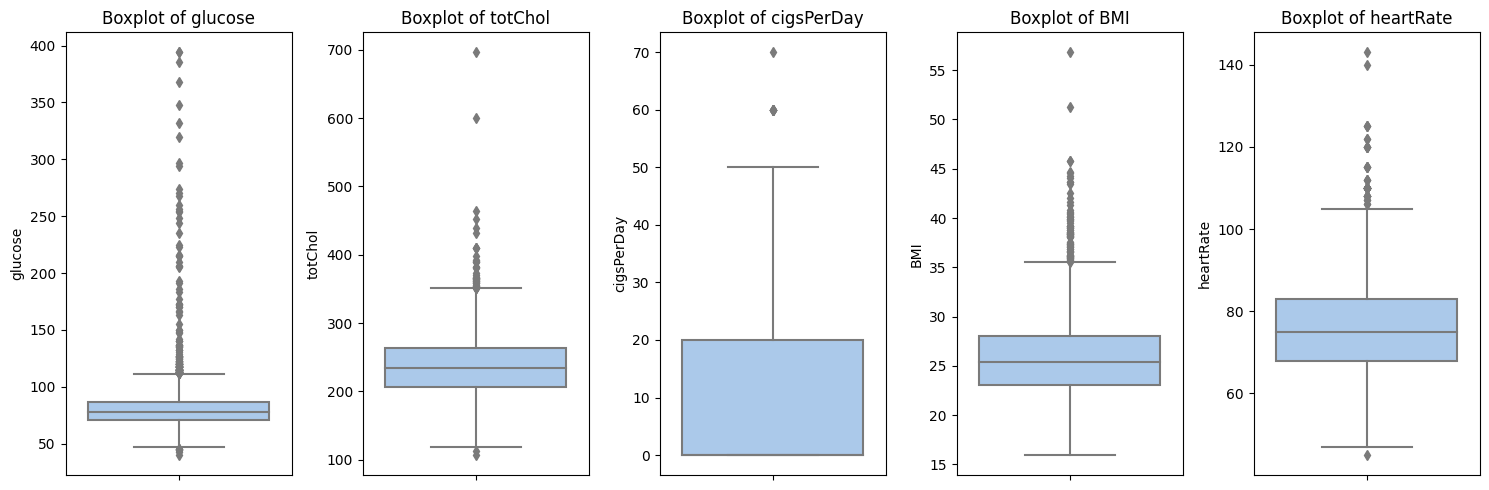

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for boxplots
columns = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']

# Create subplots for boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# Iterate over the columns and create boxplots
for i, column in enumerate(columns):
    ax = axes[i]
    sns.boxplot(data=df, y=column, ax=ax, palette='pastel')
    ax.set_ylabel(column)
    ax.set_title(f'Boxplot of {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


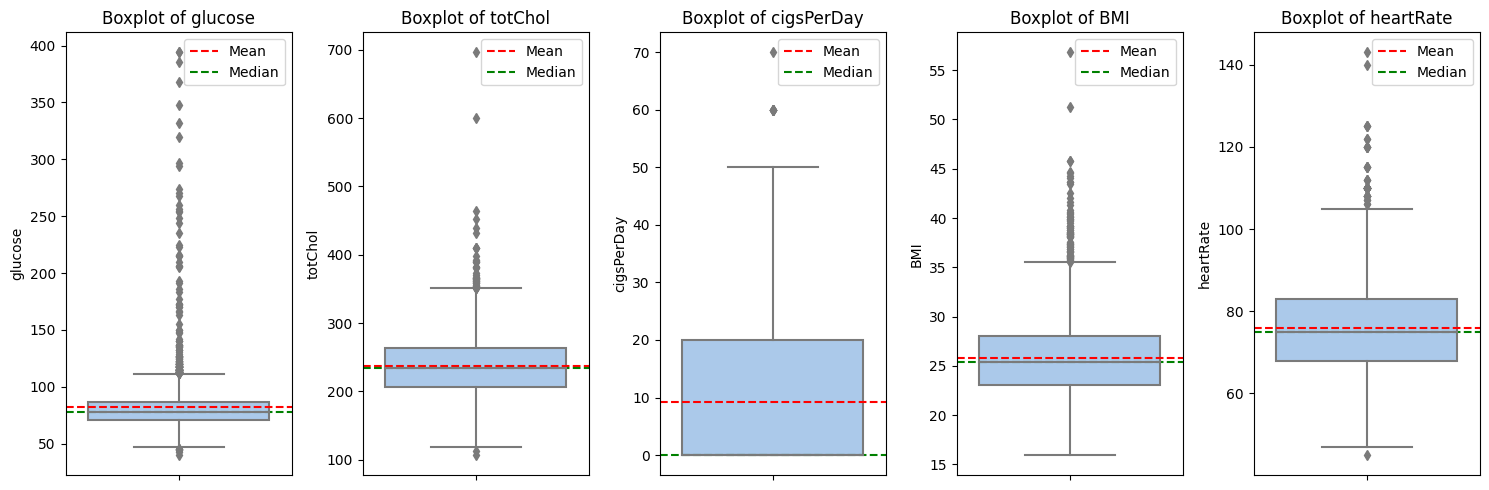

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for boxplots
columns = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']

# Create subplots for boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# Iterate over the columns and create boxplots
for i, column in enumerate(columns):
    ax = axes[i]
    sns.boxplot(data=df, y=column, ax=ax, palette='pastel')
    ax.set_ylabel(column)
    ax.set_title(f'Boxplot of {column}')

    # Add mean and median lines
    ax.axhline(df[column].mean(), color='red', linestyle='--', label='Mean')
    ax.axhline(df[column].median(), color='green', linestyle='--', label='Median')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
for var in ['totChol', 'BMI', 'heartRate']:
  imputing_median = df[var].median()
  df[var]  = df[var].fillna(imputing_median)

In [ ]:
null_counts = df.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of null values in each numerical column
null_percentages = (null_counts / len(df)) * 100

# Create a DataFrame with null counts and percentages
null_table = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

# Display the null table
print(null_table)

                 Null Count  Null Percentage
glucose                 302         9.025702
education                87         2.600120
id                        0         0.000000
diabetes                  0         0.000000
heartRate                 0         0.000000
BMI                       0         0.000000
diaBP                     0         0.000000
sysBP                     0         0.000000
totChol                   0         0.000000
prevalentHyp              0         0.000000
age                       0         0.000000
prevalentStroke           0         0.000000
BPMeds                    0         0.000000
cigsPerDay                0         0.000000
is_smoking                0         0.000000
sex                       0         0.000000
TenYearCHD                0         0.000000


In [ ]:
df.drop('id', axis=1, inplace=True)
# df.drop('education', axis=1, inplace=True)
# df.drop(['is_smoking', 'prevalentStroke'], axis=1, inplace=True)

In [ ]:
df_glucose_median = df.copy()
df_glucose_regression = df.copy()
df_glucose_knn = df.copy()

In [ ]:
imputing_median2 = df_glucose_median['glucose'].median()
df_glucose_median['glucose'] = df_glucose_median['glucose'].fillna(imputing_median2)

In [ ]:
df_glucose_median.isnull().sum()

age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
df_glucose_regression.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            302
TenYearCHD           0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# fit and transform the imputer on your data
imputer = IterativeImputer(random_state = 0)
imputer.fit(df_glucose_regression[['glucose']])

df_glucose_regression[['glucose']] = imputer.transform(df_glucose_regression[['glucose']])


In [ ]:
df_glucose_regression.isnull().sum()

age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
df_glucose_knn.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            302
TenYearCHD           0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

imputer.fit(df_glucose_knn[['glucose']])

df_glucose_knn[['glucose']] = imputer.transform(df_glucose_knn[['glucose']])


In [ ]:
df_glucose_knn.isnull().sum()

age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
# Get the numeric columns
numeric_columns = df_glucose_median.select_dtypes(include='number')

# Iterate over each numeric column
for column in numeric_columns:
    # Calculate the mean and median
    mean_value = df_glucose_median[column].mean()
    median_value = df_glucose_median[column].median()

    # Print the column name, mean, and median
    print(f"Column: {column}")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print()


Column: age
Mean: 49.49
Median: 49.00

Column: cigsPerDay
Mean: 9.15
Median: 0.00

Column: totChol
Mean: 236.98
Median: 234.00

Column: sysBP
Mean: 132.50
Median: 128.00

Column: diaBP
Mean: 82.86
Median: 82.00

Column: BMI
Mean: 25.80
Median: 25.40

Column: heartRate
Mean: 75.98
Median: 75.00

Column: glucose
Mean: 81.73
Median: 78.00



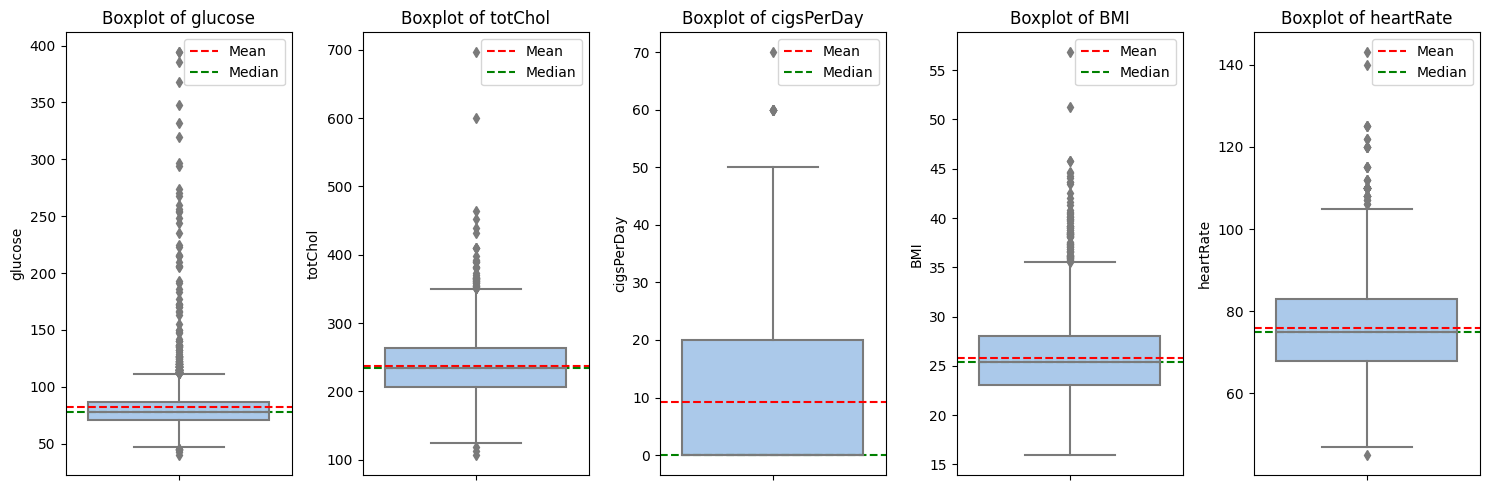

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for boxplots
columns = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']

# Create subplots for boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# Iterate over the columns and create boxplots
for i, column in enumerate(columns):
    ax = axes[i]
    sns.boxplot(data=df, y=column, ax=ax, palette='pastel')
    ax.set_ylabel(column)
    ax.set_title(f'Boxplot of {column}')

    # Add mean and median lines
    ax.axhline(df[column].mean(), color='red', linestyle='--', label='Mean')
    ax.axhline(df[column].median(), color='green', linestyle='--', label='Median')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_glucose_median_win = df_glucose_median.copy()
df_glucose_regression_win = df_glucose_regression.copy()
df_glucose_knn_win = df_glucose_knn.copy()

In [ ]:
from scipy.stats import mstats

# Winsorize the 'glucose' column with an upper limit of 0.1
glucose_winsorized_m = mstats.winsorize(df_glucose_median_win['glucose'], limits=(None, 0.1))
df_glucose_median_win['glucose'] = glucose_winsorized_m

# Winsorize the 'totChol' column with an upper limit of 0.01
totChol_winsorized_m = mstats.winsorize(df_glucose_median_win['totChol'], limits=(None, 0.01))
df_glucose_median_win['totChol'] = totChol_winsorized_m

# Winsorize the 'BMI' column with an upper limit of 0.01
bmi_winsorized_m = mstats.winsorize(df_glucose_median_win['BMI'], limits=(None, 0.01))
df_glucose_median_win['BMI'] = bmi_winsorized_m

# Winsorize the 'heartRate' column with an upper limit of 0.01
heartrate_winsorized_m = mstats.winsorize(df_glucose_median_win['heartRate'], limits=(None, 0.01))
df_glucose_median_win['heartRate'] = heartrate_winsorized_m

#####

# Winsorize the 'glucose' column with an upper limit of 0.1
glucose_winsorized_r = mstats.winsorize(df_glucose_regression_win['glucose'], limits=(None, 0.1))
df_glucose_regression_win['glucose'] = glucose_winsorized_r

# Winsorize the 'totChol' column with an upper limit of 0.01
totChol_winsorized_r = mstats.winsorize(df_glucose_regression_win['totChol'], limits=(None, 0.01))
df_glucose_regression_win['totChol'] = totChol_winsorized_r

# Winsorize the 'BMI' column with an upper limit of 0.01
bmi_winsorized_r = mstats.winsorize(df_glucose_regression_win['BMI'], limits=(None, 0.01))
df_glucose_regression_win['BMI'] = bmi_winsorized_r

# Winsorize the 'heartRate' column with an upper limit of 0.01
heartrate_winsorized_r = mstats.winsorize(df_glucose_regression_win['heartRate'], limits=(None, 0.01))
df_glucose_regression_win['heartRate'] = heartrate_winsorized_r

####
# Winsorize the 'glucose' column with an upper limit of 0.1
glucose_winsorized_k = mstats.winsorize(df_glucose_knn_win['glucose'], limits=(None, 0.1))
df_glucose_knn_win['glucose'] = glucose_winsorized_k

# Winsorize the 'totChol' column with an upper limit of 0.01
totChol_winsorized_k = mstats.winsorize(df_glucose_knn_win['totChol'], limits=(None, 0.01))
df_glucose_knn_win['totChol'] = totChol_winsorized_k

# Winsorize the 'BMI' column with an upper limit of 0.01
bmi_winsorized_k = mstats.winsorize(df_glucose_knn_win['BMI'], limits=(None, 0.01))
df_glucose_knn_win['BMI'] = bmi_winsorized_k

# Winsorize the 'heartRate' column with an upper limit of 0.01
heartrate_winsorized_k = mstats.winsorize(df_glucose_knn_win['heartRate'], limits=(None, 0.01))
df_glucose_knn_win['heartRate'] = heartrate_winsorized_k

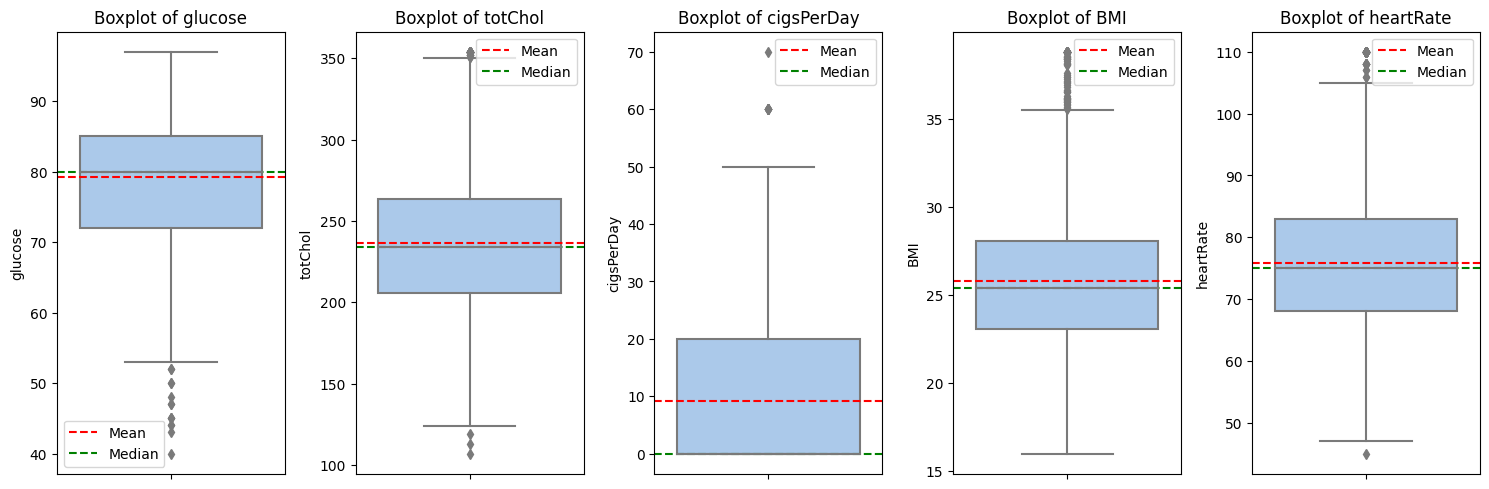

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for boxplots
columns = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']

# Create subplots for boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# Iterate over the columns and create boxplots
for i, column in enumerate(columns):
    ax = axes[i]
    sns.boxplot(data=df_glucose_knn_win, y=column, ax=ax, palette='pastel')
    ax.set_ylabel(column)
    ax.set_title(f'Boxplot of {column}')

    # Add mean and median lines
    ax.axhline(df_glucose_knn_win[column].mean(), color='red', linestyle='--', label='Mean')
    ax.axhline(df_glucose_knn_win[column].median(), color='green', linestyle='--', label='Median')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_glucose_median.shape

(3346, 16)

In [ ]:
df_glucose_median = pd.get_dummies(df_glucose_median, drop_first=True)
df_glucose_median_win = pd.get_dummies(df_glucose_median_win, drop_first=True)

df_glucose_regression = pd.get_dummies(df_glucose_regression, drop_first=True)
df_glucose_regression_win = pd.get_dummies(df_glucose_regression_win, drop_first=True)

df_glucose_knn = pd.get_dummies(df_glucose_knn, drop_first=True)
df_glucose_knn_win = pd.get_dummies(df_glucose_knn_win, drop_first=True)

In [ ]:
df_glucose_median.shape

(3346, 18)

In [ ]:
X_gm = df_glucose_median.drop(['TenYearCHD_1'], axis = 1)
y_gm = df_glucose_median['TenYearCHD_1']

X_gmw = df_glucose_median_win.drop(['TenYearCHD_1'], axis = 1)
y_gmw = df_glucose_median_win['TenYearCHD_1']

X_gr = df_glucose_regression.drop(['TenYearCHD_1'], axis = 1)
y_gr = df_glucose_regression['TenYearCHD_1']

X_grw = df_glucose_regression_win.drop(['TenYearCHD_1'], axis = 1)
y_grw = df_glucose_regression_win['TenYearCHD_1']

X_gk = df_glucose_knn.drop(['TenYearCHD_1'], axis = 1)
y_gk = df_glucose_knn['TenYearCHD_1']

X_gkw = df_glucose_knn_win.drop(['TenYearCHD_1'], axis = 1)
y_gkw = df_glucose_knn_win['TenYearCHD_1']

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



# Splitting dataset X_gm and y_gm into training and testing sets
X_gm_train, X_gm_test, y_gm_train, y_gm_test = train_test_split(X_gm, y_gm, test_size=0.2, random_state=42)


# Splitting dataset X_gmw and y_gmw into training and testing sets
X_gmw_train, X_gmw_test, y_gmw_train, y_gmw_test = train_test_split(X_gmw, y_gmw, test_size=0.2, random_state=42)


# Splitting dataset X_gr and y_gr into training and testing sets
X_gr_train, X_gr_test, y_gr_train, y_gr_test = train_test_split(X_gr, y_gr, test_size=0.2, random_state=42)


# Splitting dataset X_grw and y_grw into training and testing sets
X_grw_train, X_grw_test, y_grw_train, y_grw_test = train_test_split(X_grw, y_grw, test_size=0.2, random_state=42)


# Splitting dataset X_gk and y_gk into training and testing sets
X_gk_train, X_gk_test, y_gk_train, y_gk_test = train_test_split(X_gk, y_gk, test_size=0.2, random_state=42)


# Splitting dataset X_gkw and y_gkw into training and testing sets
X_gkw_train, X_gkw_test, y_gkw_train, y_gkw_test = train_test_split(X_gkw, y_gkw, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Without SMOTE
X_gm_train_scaled = scaler.fit_transform(X_gm_train)
X_gm_test_scaled = scaler.transform(X_gm_test)

X_gmw_train_scaled = scaler.fit_transform(X_gmw_train)
X_gmw_test_scaled = scaler.transform(X_gmw_test)

X_gr_train_scaled = scaler.fit_transform(X_gr_train)
X_gr_test_scaled = scaler.transform(X_gr_test)

X_grw_train_scaled = scaler.fit_transform(X_grw_train)
X_grw_test_scaled = scaler.transform(X_grw_test)

X_gk_train_scaled = scaler.fit_transform(X_gk_train)
X_gk_test_scaled = scaler.transform(X_gk_test)

X_gkw_train_scaled = scaler.fit_transform(X_gkw_train)
X_gkw_test_scaled = scaler.transform(X_gkw_test)


### Naive Bayes on all

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Create a list to store the AUC scores
auc_scores = []

# Train and evaluate Gaussian Naive Bayes for dataset X_gm
gnb_gm = GaussianNB()
gnb_gm.fit(X_gm_train_scaled, y_gm_train)
y_gm_pred = gnb_gm.predict_proba(X_gm_test_scaled)[:, 1]
auc_gm = roc_auc_score(y_gm_test, y_gm_pred)
auc_scores.append(auc_gm)

# Train and evaluate Gaussian Naive Bayes for dataset X_gmw
gnb_gmw = GaussianNB()
gnb_gmw.fit(X_gmw_train_scaled, y_gmw_train)
y_gmw_pred = gnb_gmw.predict_proba(X_gmw_test_scaled)[:, 1]
auc_gmw = roc_auc_score(y_gmw_test, y_gmw_pred)
auc_scores.append(auc_gmw)

# Train and evaluate Gaussian Naive Bayes for dataset X_gr
gnb_gr = GaussianNB()
gnb_gr.fit(X_gr_train_scaled, y_gr_train)
y_gr_pred = gnb_gr.predict_proba(X_gr_test_scaled)[:, 1]
auc_gr = roc_auc_score(y_gr_test, y_gr_pred)
auc_scores.append(auc_gr)

# Train and evaluate Gaussian Naive Bayes for dataset X_grw
gnb_grw = GaussianNB()
gnb_grw.fit(X_grw_train_scaled, y_grw_train)
y_grw_pred = gnb_grw.predict_proba(X_grw_test_scaled)[:, 1]
auc_grw = roc_auc_score(y_grw_test, y_grw_pred)
auc_scores.append(auc_grw)

# Train and evaluate Gaussian Naive Bayes for dataset X_gk
gnb_gk = GaussianNB()
gnb_gk.fit(X_gk_train_scaled, y_gk_train)
y_gk_pred = gnb_gk.predict_proba(X_gk_test_scaled)[:, 1]
auc_gk = roc_auc_score(y_gk_test, y_gk_pred)
auc_scores.append(auc_gk)

# Train and evaluate Gaussian Naive Bayes for dataset X_gkw
gnb_gkw = GaussianNB()
gnb_gkw.fit(X_gkw_train_scaled, y_gkw_train)
y_gkw_pred = gnb_gkw.predict_proba(X_gkw_test_scaled)[:, 1]
auc_gkw = roc_auc_score(y_gkw_test, y_gkw_pred)
auc_scores.append(auc_gkw)

# Print the AUC scores for each dataset
for i, dataset_name in enumerate(['X_gm', 'X_gmw', 'X_gr', 'X_grw', 'X_gk', 'X_gkw']):
    print(f"AUC for {dataset_name}: {auc_scores[i]}")


AUC for X_gm: 0.7095469107551488
AUC for X_gmw: 0.7116521739130436
AUC for X_gr: 0.7094553775743707
AUC for X_grw: 0.7118535469107552
AUC for X_gk: 0.7094553775743707
AUC for X_gkw: 0.7118535469107552
